### Student Name: Aidan Keeshan
### Student ID: 18200117

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

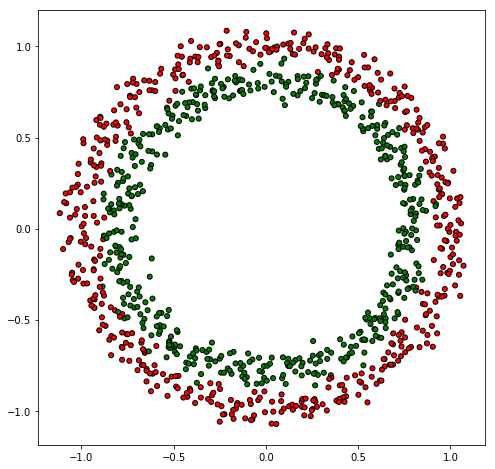

In [3]:
plt.figure(figsize=(8, 8))
colors = ['green' if yy == 1 else 'red' for yy in y] 
plt.scatter(X[:,0],X[:,1], color=colors, marker='o',s=25, edgecolors='black')
plt.show()

In [4]:
def train_test_split(X,y,test_size):
    indexs = np.arange(X.shape[0])
    np.random.shuffle(indexs)
    ind_split = np.int((1-test_size)*indexs.shape[0])
    ind_test = indexs[ind_split:]
    ind_train = indexs[:ind_split]
    y = np.array(y)
    return [X[ind_train],X[ind_test],y[ind_train],y[ind_test]]

#print (X_train.shape)
#print (y_test.shape)

In [5]:
class lin_cls:
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)        
        pseudo_inv_matrix = np.linalg.pinv(X)
        weight_matrix = pseudo_inv_matrix.dot(y)
        self.w = weight_matrix
        
    def calculate_error(self,X,y):
        yhat = self.predict(X)
        return ((y != yhat).sum()/len(y))

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return np.sign(np.dot(X, np.transpose(self.w)))
    
    def predict_point(self, X):
        return -(self.w[0]+self.w[1]*X)/self.w[2]


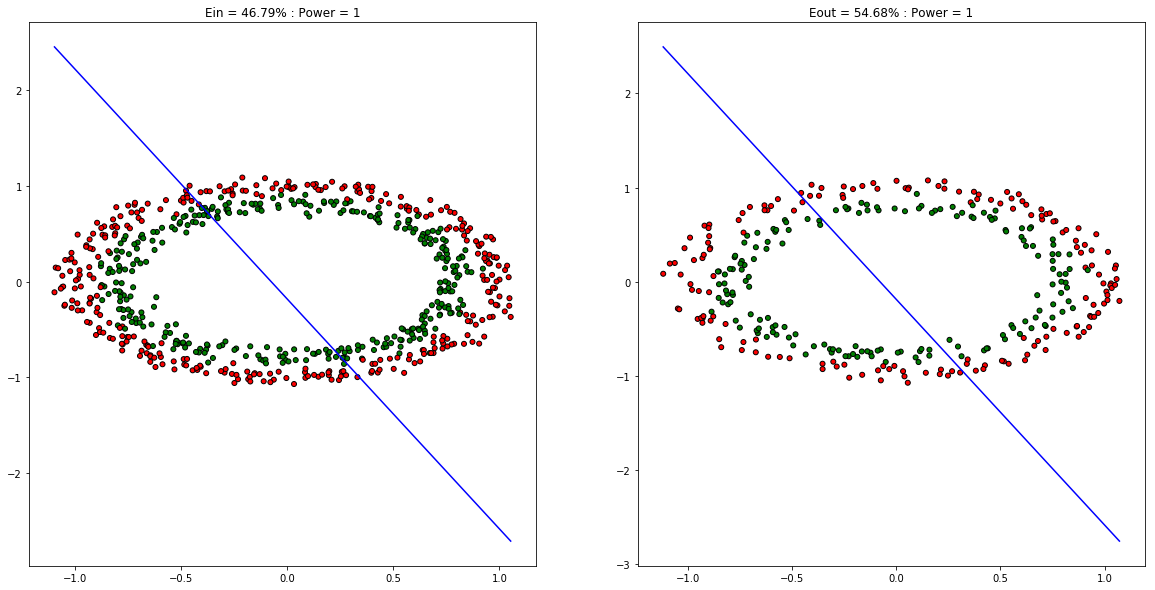

In [6]:
run_stats = []

def plot_circle(X,y,lincls,title):
    xs = [X[:,0].min(), X[:,0].max()]
    ys = [lincls.predict_point(xs[0]),lincls.predict_point(xs[1])]
    colors = ['green' if yy == 1 else 'red' for yy in y] 
    _ = plt.plot(xs, ys, color='blue')
    _ = plt.scatter(X[:,0],X[:,1], color=colors, marker='o',s=25, edgecolors='black')
    _ = plt.title(title)

def run_cls(X_in,y_in,power=1):
    X_in = np.power(X_in,power)
    X_train, X_test, y_train, y_test = train_test_split(X_in,y_in, test_size=0.33)
    lincls = lin_cls()
    lincls.fit(X_train,y_train)
    
    f, axs = plt.subplots(1, 2, figsize=(20, 10))
    plt.subplot(1, 2, 1)
    train_error = lincls.calculate_error(X_train,y_train)
    plot_circle(X_train,y_train,lincls,"Ein = {:.2%} : Power = {}".format(train_error,power))
    plt.subplot(1, 2, 2)
    test_error  = lincls.calculate_error(X_test, y_test)
    plot_circle(X_test,y_test,lincls,"Eout = {:.2%} : Power = {}".format(test_error,power))
    run_stats.append([power,train_error,test_error])
    plt.show()
    
run_cls(X,y)

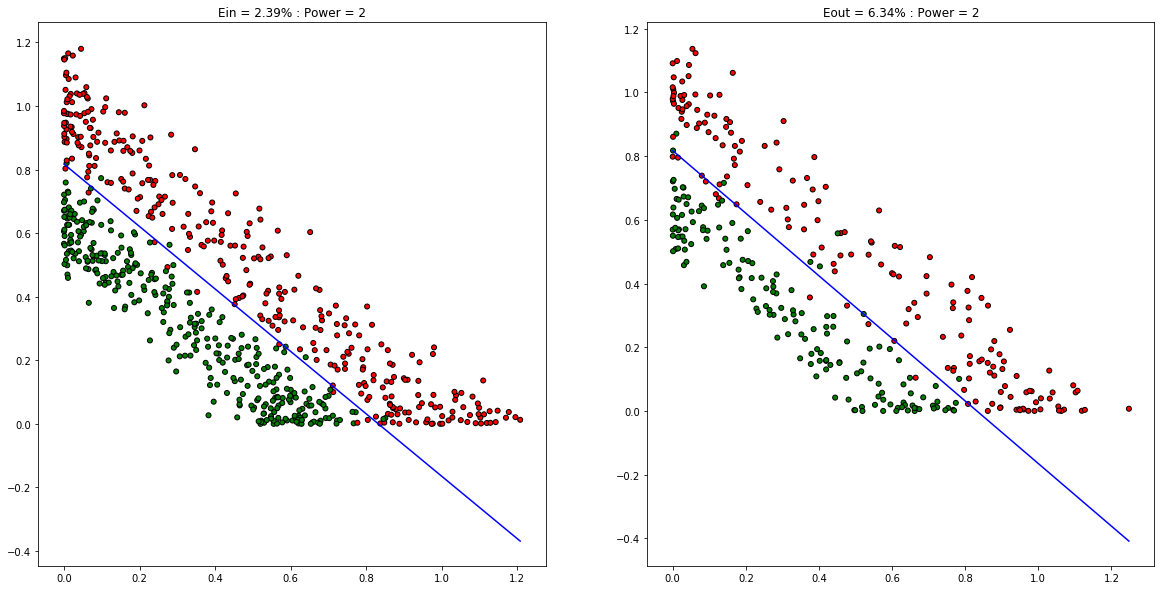

In [7]:
run_cls(X,y,2)

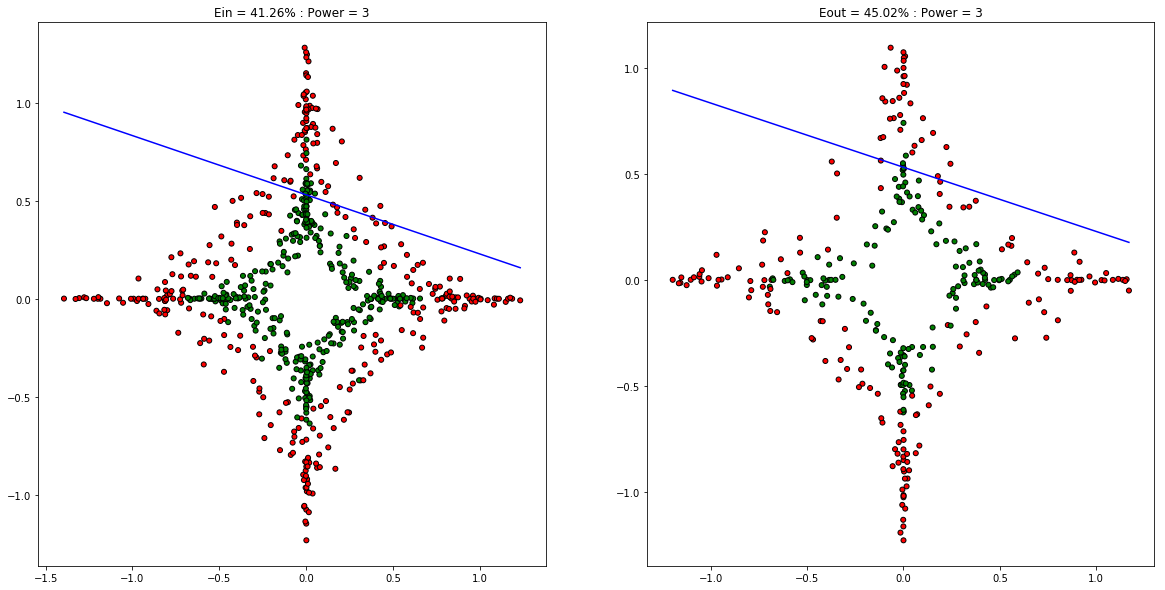

In [8]:
run_cls(X,y,3)

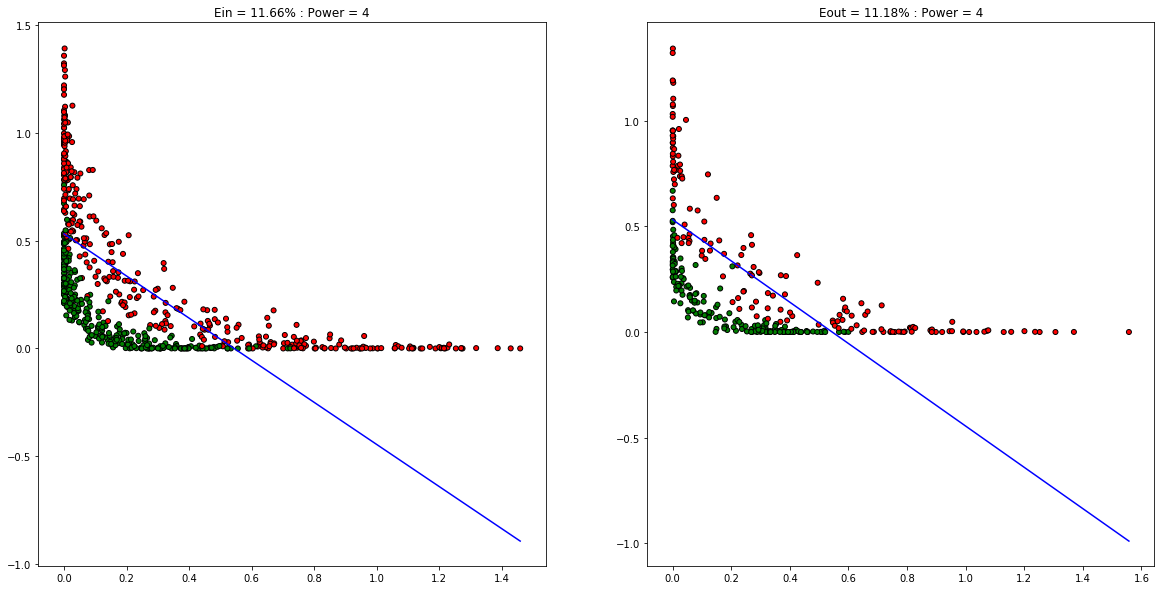

In [9]:
run_cls(X,y,4)

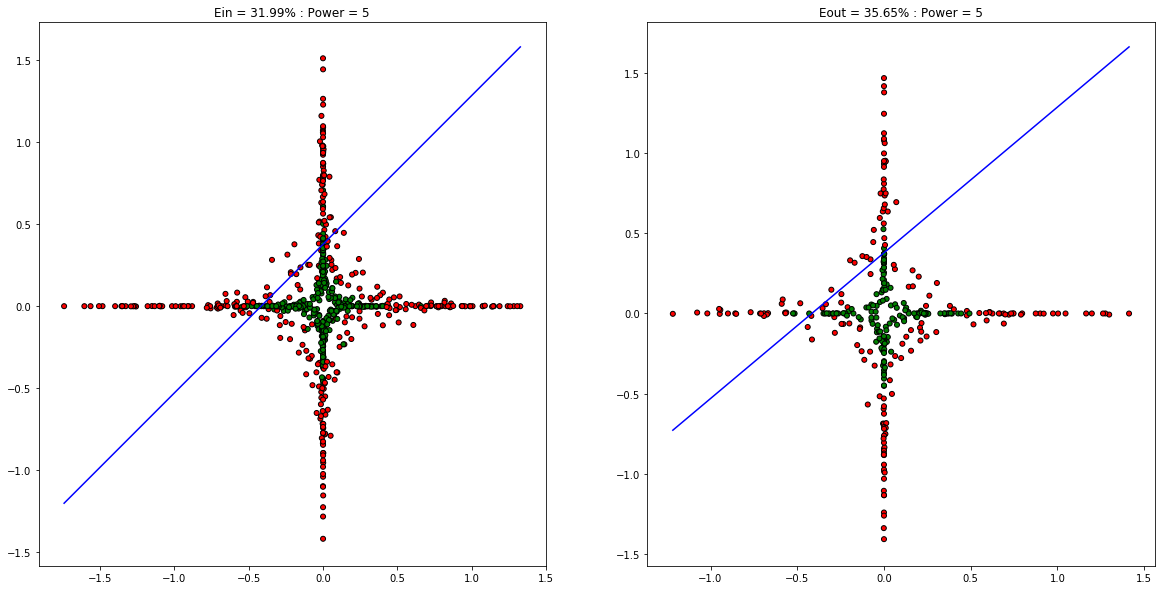

In [10]:
run_cls(X,y,5)

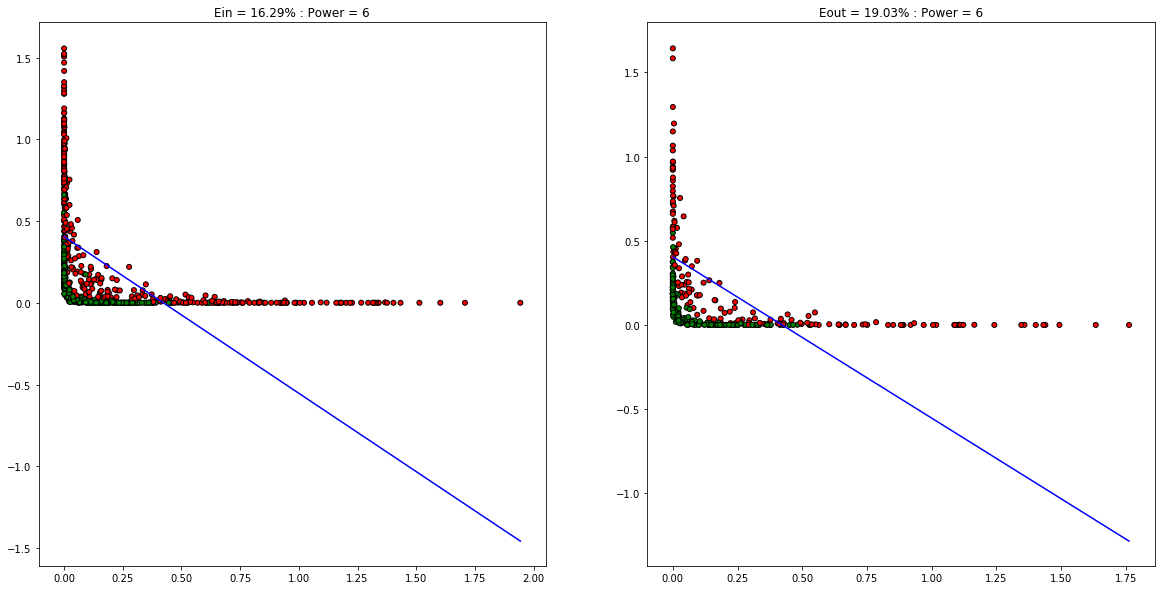

In [11]:
run_cls(X,y,6)

In [12]:
for i in range(len(run_stats)):
    if i % 2 == 0:
        print ("\x1b[31mPower:  {}\t\tEin = {:.2%}\t\tEin = {:.2%}\x1b[0m".format(run_stats[i][0],run_stats[i][1],run_stats[i][2]))
    else:
        print ("\x1b[32mPower:  {}\t\tEin = {:.2%}\t\tEin = {:.2%}\x1b[0m".format(run_stats[i][0],run_stats[i][1],run_stats[i][2]))

Power:  1		Ein = 46.79%		Ein = 54.68%
Power:  2		Ein = 2.39%		Ein = 6.34%
Power:  3		Ein = 41.26%		Ein = 45.02%
Power:  4		Ein = 11.66%		Ein = 11.18%
Power:  5		Ein = 31.99%		Ein = 35.65%
Power:  6		Ein = 16.29%		Ein = 19.03%


## Conclusion
Moving from first power to second significantly decreases the Ein and Eout.   
As we know that the source data is effectively 2 concentric circles this is to be expected.   
From here the even powers have better classification than the odd powers.   
Also indication that the VC dimension is  not increasing linearly.  
Learning can be said to be happening.

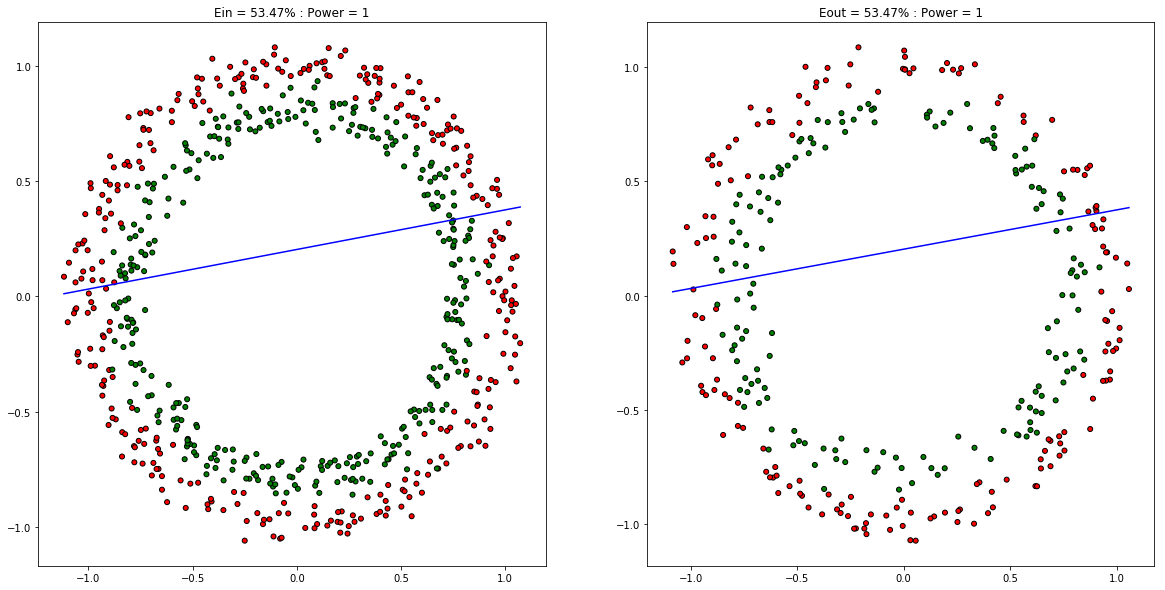

In [13]:
run_stats = []

def skl_point(X,skl_cls):
    xs = [X[:,0].min(), X[:,0].max()]
    ys = []
    for x in xs:
        ys.append(np.float(-(skl_cls.intercept_+skl_cls.coef_[0][0]*x)/skl_cls.coef_[0][1]))
    return xs,ys

def plot_circle(X,y,skl_cls,title):
    xs,ys = skl_point(X,skl_cls)
    colors = ['green' if yy == 1 else 'red' for yy in y] 
    _ = plt.plot(xs, ys, color='blue')
    _ = plt.scatter(X[:,0],X[:,1], color=colors, marker='o',s=25, edgecolors='black')
    _ = plt.title(title)

def run_skl(X_in,y_in,power=1):
    X_in = np.power(X_in,power)
    X_train, X_test, y_train, y_test = train_test_split(X_in,y_in, test_size=0.33)
    lincls_skl = LogisticRegression(solver ='lbfgs',fit_intercept=True)
    lincls_skl.fit(X_train,list(y_train))

    f, axs = plt.subplots(1, 2, figsize=(20, 10))
    plt.subplot(1, 2, 1)
    train_error = 1 - lincls_skl.score(X_test, list(y_test))
    plot_circle(X_train,y_train,lincls_skl,"Ein = {:.2%} : Power = {}".format(train_error,power))
    plt.subplot(1, 2, 2)
    test_error  =  1 - lincls_skl.score(X_test, list(y_test))
    plot_circle(X_test,y_test,lincls_skl,"Eout = {:.2%} : Power = {}".format(test_error,power))
    run_stats.append([power,train_error,test_error])
    plt.show()
    
run_skl(X,y)

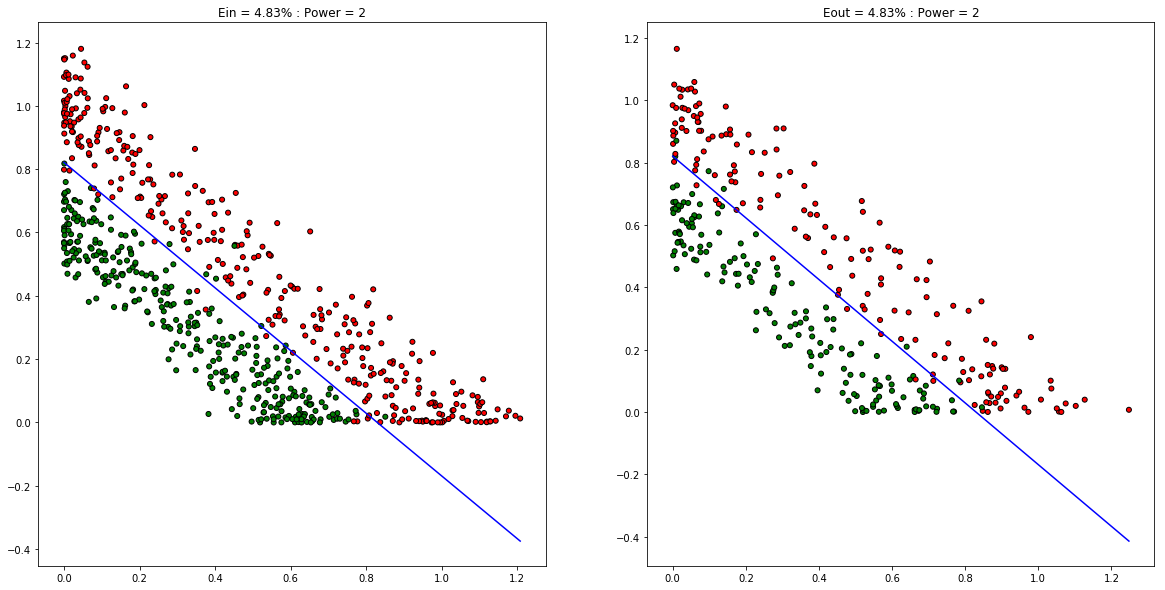

In [14]:
run_skl(X,y,2)

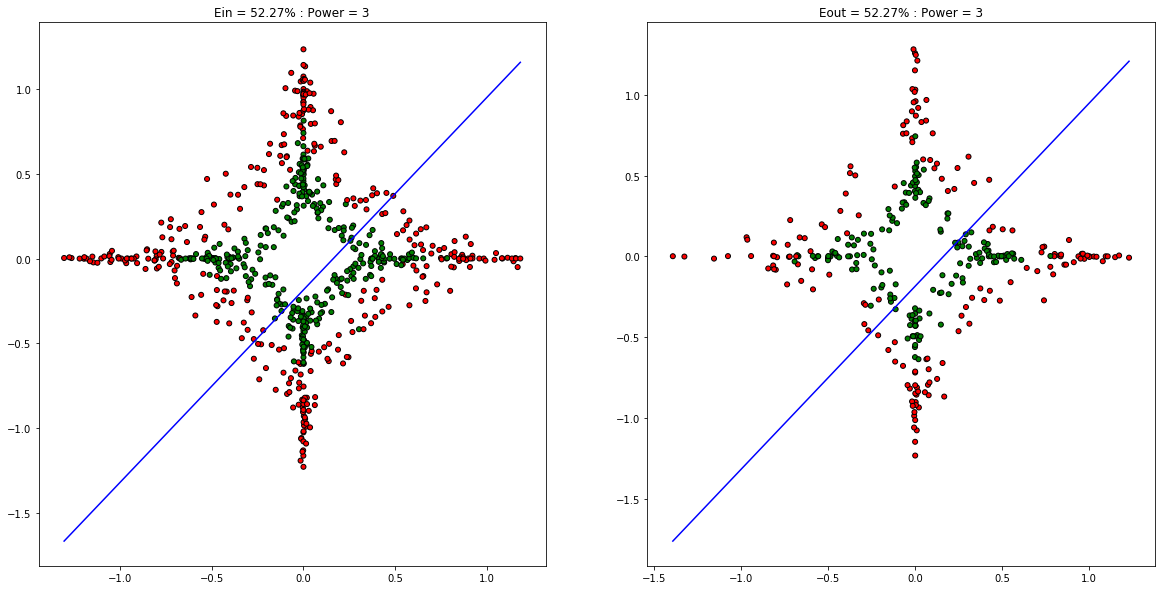

In [15]:
run_skl(X,y,3)